<a href="https://colab.research.google.com/github/karemgerges/CNN-CIFAR10-Classifier/blob/master/CV_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Part1

### Plot funciton

In [0]:
def plot_data(num_epochs, kernels, accuracies):
  y_pos = np.arange(len(accuracies))
  plt.bar(y_pos, accuracies, align='center', alpha=0.5)
  plt.xticks(y_pos, kernels)
  plt.ylabel('Accuracy')
  plt.xlabel('Kernel Size')
  title = 'Number of Epochs = {}'.format(num_epochs)
  plt.title(title)
  plt.show(True)

###Print Funciton


In [0]:
def print_accuracies(epochs, kernels, accuracies):
  print('#epochs = ', epochs)
  print('{')
  for i in range(len(accuracies)):
    print('\tkernel size = ', kernels[i])
    print('\tAccuracy of the network on the 10000 test images = {}%'.format(accuracies[i]))
    print()
  print('}')
  print('==================')

##Loading CIFAR10

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


##Define a Convolutional Neural Network

In [0]:
class Net(nn.Module):
       
    def __init__(self,kernel_size):
        # 3 input image channel, 6 output channels, kernel_size * kernel_size
        # square convolution kernel
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size)
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size)
        # fully connected takes nn.Linear(size of input, size to output)
        fc1_input_size = self.calculate_fc1_input_size(kernel_size, num_conv_layers=2)
        #print('size is :' ,self.fc1_input_size)
        self.fc1 = nn.Linear(16 * fc1_input_size * fc1_input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        # 10 = number of classes we are classifing to
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
      
    def calculate_fc1_input_size(self, kernel_size, num_conv_layers):
        image_single_dim = 32
        val = image_single_dim
        kernel_sub = (kernel_size - 1)
        for i in range(num_conv_layers):
          val = int((val - kernel_sub) / 2)
        return val

##Training Function

In the neural network terminology:
* **one epoch** = *one forward pass and one backward pass* of all the training examples

* **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

* **number of iterations** = number of passes, each pass using number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

[Quora Link](https://www.quora.com/What-is-the-difference-between-iterations-and-epochs-in-Convolution-neural-networks)


In [0]:
def train(epochs):
  for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            running_loss = 0.0

##Testing Function

In [0]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return int(((100 * correct) / total))

##Run CNN

In [0]:
results = list()
kernels = [3, 5, 7]
epochs_values = [3]
for epochs in epochs_values:
  accuracies = list()
  for kernel_size in kernels:
    net = Net(kernel_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    train(epochs)
    accuracy = test()
    accuracies.append(accuracy)
  results.append([epochs, kernels, accuracies])

##Print Results

In [0]:
for tuple in results:
  print_accuracies(tuple[0], tuple[1], tuple[2])

#epochs =  3
{
	kernel size =  3
	Accuracy of the network on the 10000 test images = 59%

	kernel size =  5
	Accuracy of the network on the 10000 test images = 56%

	kernel size =  7
	Accuracy of the network on the 10000 test images = 52%

}
#epochs =  6
{
	kernel size =  3
	Accuracy of the network on the 10000 test images = 63%

	kernel size =  5
	Accuracy of the network on the 10000 test images = 62%

	kernel size =  7
	Accuracy of the network on the 10000 test images = 55%

}


## Plot Results

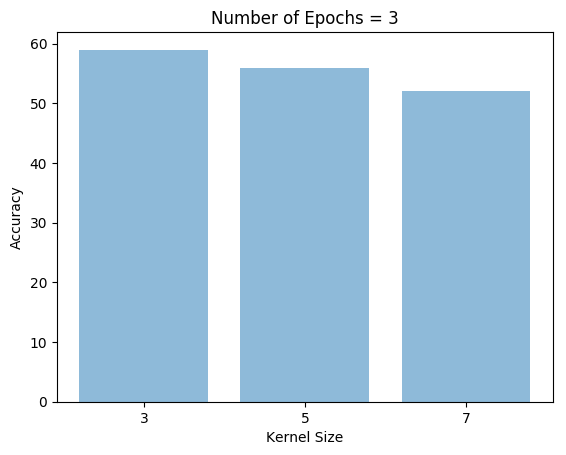

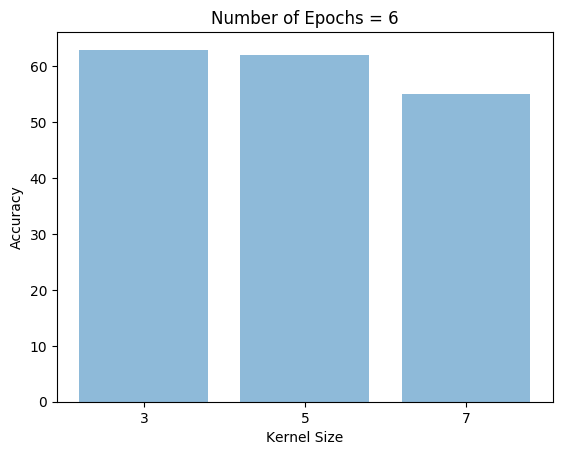

In [0]:
for tuple in results:
  plot_data(tuple[0], tuple[1], tuple[2])

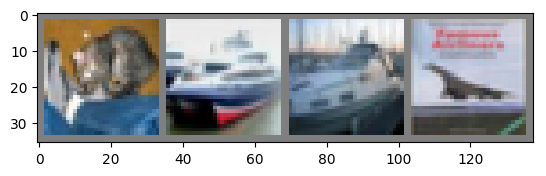

GroundTruth:    cat  ship  ship plane
Predicted:   frog plane  ship plane


In [0]:
S

#Part2

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import model_zoo

In [0]:
__all__ = ['GoogLeNet', 'googlenet']

model_urls = {
    # GoogLeNet ported from TensorFlow
    'googlenet': 'https://download.pytorch.org/models/googlenet-1378be20.pth',
}

In [0]:
def googlenet(pretrained=False, **kwargs):
    r"""GoogLeNet (Inception v1) model architecture from
    `"Going Deeper with Convolutions" <http://arxiv.org/abs/1409.4842>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        transform_input (bool): If True, preprocesses the input according to the method with which it
            was trained on ImageNet. Default: *False*
    """
    if pretrained:
        if 'transform_input' not in kwargs:
            kwargs['transform_input'] = True
        kwargs['init_weights'] = False
        model = GoogLeNet(**kwargs)
        model.load_state_dict(model_zoo.load_url(model_urls['googlenet']))
        return model

    return GoogLeNet(**kwargs)

In [0]:
class GoogLeNet(nn.Module):

    def __init__(self, num_classes=1000, aux_logits=True, transform_input=False, init_weights=True):
        super(GoogLeNet, self).__init__()
        self.aux_logits = aux_logits
        self.transform_input = transform_input

        self.conv1 = BasicConv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, ceil_mode=True)
        self.conv2 = BasicConv2d(64, 64, kernel_size=1)
        self.conv3 = BasicConv2d(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)
        if aux_logits:
            self.aux1 = InceptionAux(512, num_classes)
            self.aux2 = InceptionAux(528, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, num_classes)

        if init_weights:
            self._initialize_weights()
            
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0.2)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)

        # N x 3 x 224 x 224
        x = self.conv1(x)
        # N x 64 x 112 x 112
        x = self.maxpool1(x)
        # N x 64 x 56 x 56
        x = self.conv2(x)
        # N x 64 x 56 x 56
        x = self.conv3(x)
        # N x 192 x 56 x 56
        x = self.maxpool2(x)

        # N x 192 x 28 x 28
        x = self.inception3a(x)
        # N x 256 x 28 x 28
        x = self.inception3b(x)
        # N x 480 x 28 x 28
        x = self.maxpool3(x)
        # N x 480 x 14 x 14
        x = self.inception4a(x)
        # N x 512 x 14 x 14
        if self.training and self.aux_logits:
            aux1 = self.aux1(x)

        x = self.inception4b(x)
        # N x 512 x 14 x 14
        x = self.inception4c(x)
        # N x 512 x 14 x 14
        x = self.inception4d(x)
        # N x 528 x 14 x 14
        if self.training and self.aux_logits:
            aux2 = self.aux2(x)

        x = self.inception4e(x)
        # N x 832 x 14 x 14
        x = self.maxpool4(x)
        # N x 832 x 7 x 7
        x = self.inception5a(x)
        # N x 832 x 7 x 7
        x = self.inception5b(x)
        # N x 1024 x 7 x 7

        x = self.avgpool(x)
        # N x 1024 x 1 x 1
        x = x.view(x.size(0), -1)
        # N x 1024
        x = self.dropout(x)
        x = self.fc(x)
        # N x 1000 (num_classes)
        if self.training and self.aux_logits:
            return aux1, aux2, x
        return x

In [0]:
class Inception(nn.Module):

    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception, self).__init__()

        self.branch1 = BasicConv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, ch3x3red, kernel_size=1),
            BasicConv2d(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            BasicConv2d(in_channels, ch5x5red, kernel_size=1),
            BasicConv2d(ch5x5red, ch5x5, kernel_size=3, padding=1)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1, ceil_mode=True),
            BasicConv2d(in_channels, pool_proj, kernel_size=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1)

In [0]:
class InceptionAux(nn.Module):

    def __init__(self, in_channels, num_classes):
        super(InceptionAux, self).__init__()
        self.conv = BasicConv2d(in_channels, 128, kernel_size=1)

        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        # aux1: N x 512 x 14 x 14, aux2: N x 528 x 14 x 14
        x = F.adaptive_avg_pool2d(x, (4, 4))
        # aux1: N x 512 x 4 x 4, aux2: N x 528 x 4 x 4
        x = self.conv(x)
        # N x 128 x 4 x 4
        x = x.view(x.size(0), -1)
        # N x 2048
        x = F.relu(self.fc1(x), inplace=True)
        # N x 2048
        x = F.dropout(x, 0.7, training=self.training)
        # N x 2048
        x = self.fc2(x)
        # N x 1024

        return x

In [0]:
class BasicConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
model_save_name = 'inceptionV2.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
net = GoogLeNet(num_classes=10)
#net.load_state_dict(torch.load(path))
net.eval()
net.training = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
def train_network(net,optimizer,criterion,nums):
  for epoch in range(nums):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs[2], labels) + .3 * criterion(outputs[0], labels) + .3 * criterion(outputs[1], labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
              running_loss = 0.0
              torch.save(net.state_dict(), path)

  print('Finished Training')

In [0]:
train_network(net,optimizer,criterion,3)

[1,  2000] loss: 3.525
[1,  4000] loss: 3.048
[1,  6000] loss: 2.772
[1,  8000] loss: 2.636
[1, 10000] loss: 2.483
[1, 12000] loss: 2.379
[2,  2000] loss: 2.275
[2,  4000] loss: 2.164
[2,  6000] loss: 2.112
[2,  8000] loss: 2.012
[2, 10000] loss: 1.980
[2, 12000] loss: 1.912
[3,  2000] loss: 1.770
[3,  4000] loss: 1.771
[3,  6000] loss: 1.712
[3,  8000] loss: 1.685
[3, 10000] loss: 1.649
[3, 12000] loss: 1.616
Finished Training


In [0]:
torch.save(net.state_dict(), path)
net.training = False

In [0]:
def compute_accurcay(net):
  correct = 0
  total = 0
  net.to('cpu')
  #net.to(device)
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          #print('Accuracy of the network on the 10000 test images: %d %%' % (
          #    100 * correct / total))
  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))

In [0]:
compute_accurcay(net)

Accuracy of the network on the 10000 test images: 65 %


#inception v2

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import model_zoo

In [0]:
__all__ = ['GoogLeNet', 'googlenet']

model_urls = {
    # GoogLeNet ported from TensorFlow
    'googlenet': 'https://download.pytorch.org/models/googlenet-1378be20.pth',
}

In [0]:
def googlenet(pretrained=False, **kwargs):
    r"""GoogLeNet (Inception v1) model architecture from
    `"Going Deeper with Convolutions" <http://arxiv.org/abs/1409.4842>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        transform_input (bool): If True, preprocesses the input according to the method with which it
            was trained on ImageNet. Default: *False*
    """
    if pretrained:
        if 'transform_input' not in kwargs:
            kwargs['transform_input'] = True
        kwargs['init_weights'] = False
        model = GoogLeNet(**kwargs)
        model.load_state_dict(model_zoo.load_url(model_urls['googlenet']))
        return model

    return GoogLeNet(**kwargs)

In [0]:
class GoogLeNet(nn.Module):

    def __init__(self, num_classes=1000, aux_logits=True, transform_input=False, init_weights=True):
        super(GoogLeNet, self).__init__()
        self.aux_logits = aux_logits
        self.transform_input = transform_input

        self.conv1 = BasicConv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, ceil_mode=True)
        self.conv2 = BasicConv2d(64, 64, kernel_size=1)
        self.conv3 = BasicConv2d(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)
        if aux_logits:
            self.aux1 = InceptionAux(512, num_classes)
            self.aux2 = InceptionAux(528, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, num_classes)

        if init_weights:
            self._initialize_weights()
            
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0.2)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)

        # N x 3 x 224 x 224
        x = self.conv1(x)
        # N x 64 x 112 x 112
        x = self.maxpool1(x)
        # N x 64 x 56 x 56
        x = self.conv2(x)
        # N x 64 x 56 x 56
        x = self.conv3(x)
        # N x 192 x 56 x 56
        x = self.maxpool2(x)

        # N x 192 x 28 x 28
        x = self.inception3a(x)
        # N x 256 x 28 x 28
        x = self.inception3b(x)
        # N x 480 x 28 x 28
        x = self.maxpool3(x)
        # N x 480 x 14 x 14
        x = self.inception4a(x)
        # N x 512 x 14 x 14
        if self.training and self.aux_logits:
            aux1 = self.aux1(x)

        x = self.inception4b(x)
        # N x 512 x 14 x 14
        x = self.inception4c(x)
        # N x 512 x 14 x 14
        x = self.inception4d(x)
        # N x 528 x 14 x 14
        if self.training and self.aux_logits:
            aux2 = self.aux2(x)

        x = self.inception4e(x)
        # N x 832 x 14 x 14
        x = self.maxpool4(x)
        # N x 832 x 7 x 7
        x = self.inception5a(x)
        # N x 832 x 7 x 7
        x = self.inception5b(x)
        # N x 1024 x 7 x 7

        x = self.avgpool(x)
        # N x 1024 x 1 x 1
        x = x.view(x.size(0), -1)
        # N x 1024
        x = self.dropout(x)
        x = self.fc(x)
        # N x 1000 (num_classes)
        if self.training and self.aux_logits:
            return aux1, aux2, x
        return x

In [0]:
class Inception(nn.Module):

    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception, self).__init__()

        self.branch1 = BasicConv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, ch3x3red, kernel_size=1),
            BasicConv2d(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            BasicConv2d(in_channels, ch5x5red, kernel_size=1),
            BasicConv2d(ch5x5red, ch5x5, kernel_size=3, padding=1),
            BasicConv2d(ch5x5, ch5x5, kernel_size=3, padding=1),
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1, ceil_mode=True),
            BasicConv2d(in_channels, pool_proj, kernel_size=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1)

In [0]:
class InceptionAux(nn.Module):

    def __init__(self, in_channels, num_classes):
        super(InceptionAux, self).__init__()
        self.conv = BasicConv2d(in_channels, 128, kernel_size=1)

        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        # aux1: N x 512 x 14 x 14, aux2: N x 528 x 14 x 14
        x = F.adaptive_avg_pool2d(x, (4, 4))
        # aux1: N x 512 x 4 x 4, aux2: N x 528 x 4 x 4
        x = self.conv(x)
        # N x 128 x 4 x 4
        x = x.view(x.size(0), -1)
        # N x 2048
        x = F.relu(self.fc1(x), inplace=True)
        # N x 2048
        x = F.dropout(x, 0.7, training=self.training)
        # N x 2048
        x = self.fc2(x)
        # N x 1024

        return x

In [0]:
class BasicConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
model_save_name = 'inceptionV2.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
net = GoogLeNet(num_classes=10)
#net.load_state_dict(torch.load(path))
net.eval()
net.training = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
def train_network(net,optimizer,criterion,nums):
  for epoch in range(nums):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs[2], labels) + .3 * criterion(outputs[0], labels) + .3 * criterion(outputs[1], labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
              running_loss = 0.0
              torch.save(net.state_dict(), path)

  print('Finished Training')

In [0]:
train_network(net,optimizer,criterion,3)

[1,  2000] loss: 3.518
[1,  4000] loss: 3.063
[1,  6000] loss: 2.812
[1,  8000] loss: 2.631
[1, 10000] loss: 2.490
[1, 12000] loss: 2.389
[2,  2000] loss: 2.219
[2,  4000] loss: 2.159
[2,  6000] loss: 2.049
[2,  8000] loss: 1.995
[2, 10000] loss: 1.939
[2, 12000] loss: 1.894
[3,  2000] loss: 1.761
[3,  4000] loss: 1.715
[3,  6000] loss: 1.709
[3,  8000] loss: 1.667
[3, 10000] loss: 1.642
[3, 12000] loss: 1.570
Finished Training


In [0]:
torch.save(net.state_dict(), path)
net.training = False

In [0]:
def compute_accurcay(net):
  correct = 0
  total = 0
  net.to('cpu')
  #net.to(device)
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          #print('Accuracy of the network on the 10000 test images: %d %%' % (
          #    100 * correct / total))
  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))

In [0]:
compute_accurcay(net)

Accuracy of the network on the 10000 test images: 65 %
